In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [3]:
tickers1 = ['GCCHX', 'SPYX', 'ESGD']
tickers2 = ['CTEC', 'CRBN', 'EFAX']
tickers3 = ['ETHO', 'FAN']

# These are the tickers we discussed that have data that can be pulled from Alapaca. I havent tried other API's yet. 
tickersfin = ['SPYX', 'ESGD', 'CRBN', 'EFAX', 'ETHO', 'FAN']

timeframe = "1D"

# Pull 5 years of data: 
start_date = pd.Timestamp("2017-05-04", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-01-14", tz="America/New_York").isoformat()

# Ignore 
esg_data1 = api.get_barset(
    tickers1,
    timeframe,
    start=start_date,
    end=end_date
).df

# ignore 
esg_data2 = api.get_barset(
    tickers2,
    timeframe,
    start=start_date,
    end=end_date
).df

# ignore 
esg_data3 = api.get_barset(
    tickers3,
    timeframe,
    start=start_date,
    end=end_date
).df

# Here is the API call for the working tickers: 
esg_datafin = api.get_barset(
    tickersfin,
    timeframe,
    start=start_date,
    end=end_date
).df



# esg_data1.tail(10)
esg_datafin.tail(10)


CRBN                                         \
                             open      high       low     close   volume   
time                                                                       
2020-12-31 00:00:00-05:00  148.79  149.1200  148.4344  148.8900  11051.0   
2021-01-04 00:00:00-05:00  150.57  150.5700  147.3300  148.2600  22735.0   
2021-01-05 00:00:00-05:00  148.31  149.9300  148.3100  149.7400  18455.0   
2021-01-06 00:00:00-05:00  149.04  151.6100  148.9950  150.3299   8590.0   
2021-01-07 00:00:00-05:00  151.03  152.2400  151.0300  152.2400  10608.0   
2021-01-08 00:00:00-05:00  153.04  153.3450  152.2700  153.3400  14588.0   
2021-01-11 00:00:00-05:00  151.57  152.7000  151.5700  152.2499  34040.0   
2021-01-12 00:00:00-05:00  152.06  152.4900  151.5377  152.4160  11716.0   
2021-01-13 00:00:00-05:00  152.31  153.0900  152.3100  152.6800  10339.0   
2021-01-14 00:00:00-05:00  153.09  153.4784  152.5200  152.5200  15376.0   

                             EFAX                                     ...  \
                             open    high      low    close   volume  ...   
time                                                                  ...   
2020-12-31 00:00:00-05:00  78.250  78.250  77.8541  77.9700   2813.0  ...   
2021-01-04 00:00:00-05:00  79.320  79.320  77.9600  78.3900  14051.0  ...   
2021-01-05 00:00:00-05:00  78.660  79.108  78.4300  79.0800  10190.0  ...   
2021-01-06 00:00:00-05:00  79.320  79.790  79.3200  79.7000   6864.0  ...   
2021-01-07 00:00:00-05:00  79.230  79.780  79.2300  79.7800   5894.0  ...   
2021-01-08 00:00:00-05:00  80.225  80.380  79.8800  80.3000   5610.0  ...   
2021-01-11 00:00:00-05:00  78.900  79.510  78.9000  79.4169   8060.0  ...   
2021-01-12 00:00:00-05:00  79.165  79.540  79.0300  79.5400   4674.0  ...   
2021-01-13 00:00:00-05:00  79.660  79.740  79.3000  79.4841   2435.0  ...   
2021-01-14 00:00:00-05:00  79.540  80.268  79.5400  80.2680  11677.0  ...   

                             FAN                                       SPYX  \
                            open     high      low   close    volume   open   
time                                                                          
2020-12-31 00:00:00-05:00  23.38  23.3900  23.2200  23.300  133095.0  92.44   
2021-01-04 00:00:00-05:00  24.10  24.1700  23.8104  23.920  640086.0  93.28   
2021-01-05 00:00:00-05:00  24.01  24.1900  23.9501  24.165  443523.0  91.36   
2021-01-06 00:00:00-05:00  24.83  25.3700  24.6500  25.080  716286.0  91.36   
2021-01-07 00:00:00-05:00  25.80  26.0350  25.6845  26.015  676909.0  93.49   
2021-01-08 00:00:00-05:00  26.00  26.1400  25.7300  25.970  590216.0  94.25   
2021-01-11 00:00:00-05:00  25.31  25.5100  25.1500  25.470  481884.0  94.00   
2021-01-12 00:00:00-05:00  25.21  25.2156  24.9100  25.030  539505.0  93.93   
2021-01-13 00:00:00-05:00  25.21  25.2400  25.1000  25.100  373769.0  93.50   
2021-01-14 00:00:00-05:00  25.11  25.1100  24.8000  24.850  585176.0  94.17   

                                                           
                            high      low  close   volume  
time                                                       
2020-12-31 00:00:00-05:00  93.03  92.2200  93.02  14577.0  
2021-01-04 00:00:00-05:00  93.28  90.6400  91.51  40657.0  
2021-01-05 00:00:00-05:00  92.21  91.3600  92.05  21952.0  
2021-01-06 00:00:00-05:00  93.29  91.3600  92.52  32379.0  
2021-01-07 00:00:00-05:00  93.99  93.2500  93.84  37666.0  
2021-01-08 00:00:00-05:00  94.25  93.3133  94.20  28302.0  
2021-01-11 00:00:00-05:00  94.07  93.3925  93.73  38854.0  
2021-01-12 00:00:00-05:00  93.93  93.0600  93.65  15194.0  
2021-01-13 00:00:00-05:00  94.06  93.4100  93.83  17488.0  
2021-01-14 00:00:00-05:00  94.17  93.3696  93.44  20680.0  

[10 rows x 30 columns]

In [4]:
# Basic data 
esg_datafin.describe()

CRBN                                                    \
             open        high         low       close        volume   
count  929.000000  929.000000  929.000000  929.000000  9.290000e+02   
mean   119.050935  119.791873  118.294410  119.263777  1.436545e+04   
std     10.665972    9.801833   12.066609    9.900015  5.955026e+04   
min      0.000000   91.000000    0.000000   89.440000  1.320000e+02   
25%    112.660000  113.700000  111.990000  113.070000  5.014000e+03   
50%    117.820000  118.369000  117.390000  117.950000  7.231000e+03   
75%    123.070000  123.420000  122.570000  123.210000  1.279700e+04   
max    153.090000  153.478400  152.520000  153.340000  1.720440e+06   

             EFAX                                                     ...  \
             open        high         low       close         volume  ...   
count  880.000000  880.000000  880.000000  880.000000     880.000000  ...   
mean    68.649934   69.000934   68.410840   68.839216    4262.684091  ...   
std      5.686690    4.613316    6.140629    4.646381   11629.244065  ...   
min      0.000000   49.970000    0.000000   49.250000       1.000000  ...   
25%     66.352500   66.462775   66.240000   66.351000     620.000000  ...   
50%     69.400000   69.575000   69.240000   69.397500    1375.500000  ...   
75%     71.773500   72.012500   71.649675   71.908175    3442.500000  ...   
max     80.225000   80.380000   79.880000   80.300000  180001.000000  ...   

              FAN                                                    \
             open        high         low       close        volume   
count  931.000000  931.000000  931.000000  931.000000  9.310000e+02   
mean    13.970481   14.029242   13.889013   13.968169  6.826176e+04   
std      2.369840    2.382922    2.398088    2.372064  1.291487e+05   
min     10.580000   10.590000    0.000000   10.230000  1.310000e+02   
25%     12.820000   12.880000   12.775200   12.830000  1.524500e+04   
50%     13.244000   13.289900   13.200000   13.240000  2.745700e+04   
75%     13.985000   14.030000   13.915000   13.980000  6.137650e+04   
max     26.000000   26.140000   25.730000   26.015000  2.241606e+06   

             SPYX                                                     
             open        high         low       close         volume  
count  930.000000  930.000000  930.000000  930.000000     930.000000  
mean    70.507701   70.962778   69.982988   70.553122   23017.260215  
std      9.098296    8.532972    9.330577    8.470685   35091.283656  
min      0.000000   57.130000    0.000000   55.585000     165.000000  
25%     64.731050   65.000000   64.176250   64.670050    5925.750000  
50%     69.115000   69.310000   68.537200   68.895000   11517.500000  
75%     75.307500   75.862600   74.865000   75.235000   25362.250000  
max     94.250000   94.250000   93.410000   94.200000  449801.000000  

[8 rows x 30 columns]

In [5]:
esg_datafin.dropna()

CRBN                                         \
                             open      high       low     close   volume   
time                                                                       
2017-05-04 00:00:00-04:00  109.15  109.1500  106.2600  106.5300   2577.0   
2017-05-08 00:00:00-04:00  107.82  107.8200  107.3400  107.3400   7614.0   
2017-05-09 00:00:00-04:00  107.65  107.6999  107.3600  107.4299   4142.0   
2017-05-10 00:00:00-04:00  107.31  107.5200  107.3100  107.5000   9892.0   
2017-05-11 00:00:00-04:00  107.44  107.4400  106.8900  107.1500  14944.0   
...                           ...       ...       ...       ...      ...   
2021-01-08 00:00:00-05:00  153.04  153.3450  152.2700  153.3400  14588.0   
2021-01-11 00:00:00-05:00  151.57  152.7000  151.5700  152.2499  34040.0   
2021-01-12 00:00:00-05:00  152.06  152.4900  151.5377  152.4160  11716.0   
2021-01-13 00:00:00-05:00  152.31  153.0900  152.3100  152.6800  10339.0   
2021-01-14 00:00:00-05:00  153.09  153.4784  152.5200  152.5200  15376.0   

                             EFAX                                      ...  \
                             open     high      low    close   volume  ...   
time                                                                   ...   
2017-05-04 00:00:00-04:00  67.820  68.8300  67.8000  67.8000   3247.0  ...   
2017-05-08 00:00:00-04:00  68.102  69.0550  68.1020  68.9250   2549.0  ...   
2017-05-09 00:00:00-04:00  68.050  68.0500  67.9600  67.9700    194.0  ...   
2017-05-10 00:00:00-04:00  67.860  67.9400  67.8600  67.9300    127.0  ...   
2017-05-11 00:00:00-04:00  68.790  68.8799  67.5601  68.8700    560.0  ...   
...                           ...      ...      ...      ...      ...  ...   
2021-01-08 00:00:00-05:00  80.225  80.3800  79.8800  80.3000   5610.0  ...   
2021-01-11 00:00:00-05:00  78.900  79.5100  78.9000  79.4169   8060.0  ...   
2021-01-12 00:00:00-05:00  79.165  79.5400  79.0300  79.5400   4674.0  ...   
2021-01-13 00:00:00-05:00  79.660  79.7400  79.3000  79.4841   2435.0  ...   
2021-01-14 00:00:00-05:00  79.540  80.2680  79.5400  80.2680  11677.0  ...   

                             FAN                                      SPYX  \
                            open     high      low  close    volume   open   
time                                                                         
2017-05-04 00:00:00-04:00  13.14  13.2600  13.1300  13.26   13085.0  58.08   
2017-05-08 00:00:00-04:00  13.31  13.3100  13.2201  13.28   26093.0  58.60   
2017-05-09 00:00:00-04:00  13.31  13.3328  13.2500  13.26   24046.0  58.63   
2017-05-10 00:00:00-04:00  13.24  13.3190  13.2100  13.24   17243.0  58.19   
2017-05-11 00:00:00-04:00  13.21  13.2699  13.1500  13.24   32478.0  58.44   
...                          ...      ...      ...    ...       ...    ...   
2021-01-08 00:00:00-05:00  26.00  26.1400  25.7300  25.97  590216.0  94.25   
2021-01-11 00:00:00-05:00  25.31  25.5100  25.1500  25.47  481884.0  94.00   
2021-01-12 00:00:00-05:00  25.21  25.2156  24.9100  25.03  539505.0  93.93   
2021-01-13 00:00:00-05:00  25.21  25.2400  25.1000  25.10  373769.0  93.50   
2021-01-14 00:00:00-05:00  25.11  25.1100  24.8000  24.85  585176.0  94.17   

                                                             
                            high      low    close   volume  
time                                                         
2017-05-04 00:00:00-04:00  58.08  57.7200  58.0100   3750.0  
2017-05-08 00:00:00-04:00  58.60  57.9000  58.0694   1849.0  
2017-05-09 00:00:00-04:00  58.63  58.0200  58.0800   2162.0  
2017-05-10 00:00:00-04:00  58.24  58.0740  58.2400   3736.0  
2017-05-11 00:00:00-04:00  58.44  57.8671  58.0094   2482.0  
...                          ...      ...      ...      ...  
2021-01-08 00:00:00-05:00  94.25  93.3133  94.2000  28302.0  
2021-01-11 00:00:00-05:00  94.07  93.3925  93.7300  38854.0  
2021-01-12 00:00:00-05:00  93.93  93.0600  93.6500  15194.0  
2021-01-13 00:00:00-05:00  94.06  

In [6]:
# Configure a Monte Carlo simulation to forecast twenty years daily returns
MC_esg_20 = MCSimulation(
    portfolio_data = esg_datafin,
    num_simulation = 500,
    num_trading_days = 252*20
)

In [7]:
# Run simulation
MC_esg_20.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005573,1.007279,0.996619,0.997095,0.999139,1.003381,1.014240,0.998725,1.005976,0.999817,...,0.996875,1.001991,1.000350,0.998186,0.998928,1.001596,1.000548,0.991620,1.012098,1.003262
2,1.001412,1.013770,0.999602,1.002451,1.009169,1.009336,1.013472,1.001548,1.011060,1.008540,...,1.000159,1.006431,1.003077,0.998068,0.996614,1.002176,1.002205,0.996502,1.013575,1.007028
3,1.001118,1.013393,1.002645,1.012843,1.010354,1.019741,1.014468,0.993199,1.012685,1.007345,...,1.000387,1.010308,1.000207,1.000493,0.996246,1.010902,0.995641,0.997067,1.005660,1.012519
4,1.002178,1.002592,1.003699,1.001664,0.997482,1.019891,1.012518,0.993346,1.015600,1.004341,...,0.994783,1.008891,0.993118,1.000269,0.994428,1.007101,0.998945,0.999086,1.002607,1.016648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,12.493096,30.677197,13.756741,19.260424,8.695545,5.986683,12.247717,14.114547,14.573015,17.321234,...,13.246839,9.803766,20.464476,7.453827,10.797049,17.516416,10.228690,12.167638,14.810942,10.180490
5037,12.549568,30.659049,13.702288,19.321944,8.681567,5.995789,12.232815,14.267252,14.653586,17.359294,...,13.242548,9.748166,20.577464,7.465073,10.828642,17.449004,10.251118,12.175958,14.766989,10.165874
5038,12.561029,30.597499,13.649836,19.208776,8.681610,6.030633,12.255251,14.338448,14.608088,17.524939,...,13.332455,9.685431,20.390951,7.523654,10.937792,17.373567,10.186478,12.223511,14.681991,10.172932
5039,12.599188,30.663212,13.632497,19.021156,8.690100,6.028528,12.123636,14.373309,14.560629,17.541795,...,13.392055,9.701416,20.401901,7.531928,10.981486,17.477090,10.229169,12.255606,14.752184,10.215959


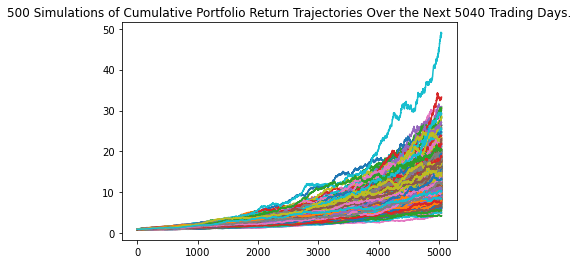

In [8]:
# Plot simulation outcomes
line_plot = MC_esg_20.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_twentyyear_sim_plot.png", bbox_inches="tight")

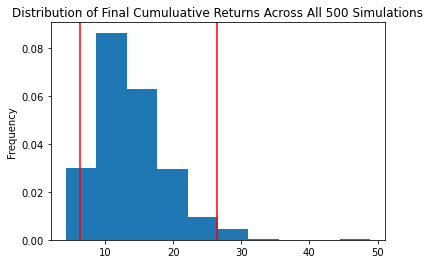

In [9]:
# Plot probability distribution and confidence intervals
dist_plot = MC_esg_20.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_twentyyear_dist_plot.png',bbox_inches='tight')

In [10]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_esg_20.simulated_return.mean(axis=1)),
    "median": list(MC_esg_20.simulated_return.median(axis=1)),
    "min": list(MC_esg_20.simulated_return.min(axis=1)),
    "max": list(MC_esg_20.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000802,1.000610,0.985042,1.016702
2,1.001256,1.000990,0.978785,1.023222
3,1.001724,1.001901,0.972613,1.027408
4,1.001485,1.001022,0.968563,1.040627


In [11]:
# Set initial investment
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.head()

,mean,median,min,max
0,10000.000000,10000.000000,10000.000000,10000.000000
1,10008.020164,10006.100254,9850.421926,10167.016710
2,10012.563151,10009.902510,9787.850673,10232.223553
3,10017.241296,10019.012948,9726.132178,10274.076603
4,10014.849032,10010.222378,9685.631140,10406.273755


<AxesSubplot:title={'center':'Simulated Outcomes Behavior of ESG Funds Over the Next Year'}>

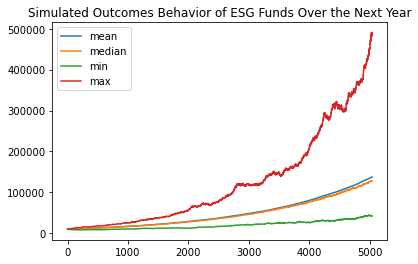

In [12]:
# Use the 'plot' function to create a chart of the simulated profits/losses
cumulative_pnl.plot(title="Simulated Outcomes Behavior of ESG Funds Over the Next Year")

In [13]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_esg_20.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             13.770914
std               5.246915
min               4.247512
25%              10.082338
50%              12.782346
75%              16.506060
max              48.910991
95% CI Lower      6.337564
95% CI Upper     26.367526
Name: 5040, dtype: float64


In [14]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in ESG funds
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next year will end within in the range of $63375.64 and $263675.26.
